# Spectral clustering / embedding

Author: Matt Smart

[Overview](#linkOverview)  
[Graph Theory](##linkGraph)  
[Details](#linkDetails)  
[Algorithm](#linkAlgorithm)  
[Example 1: MNIST](#linkExample1)  
[Example 2: Blobs](#linkExample2)  
[Resources](#linkResources)  

### Overview <a id='linkOverview'></a>
- non-linear dimension reduction technique
- rough idea: Find structure in data from the eigendecomposition of the Laplacian of the data's distance matrix
    - Step 1: Construct graph Laplacian from the pairwise distances between data points
    - Step 2: Find eigendecomposition of the Laplacian
    - Step 3: Use eigendecomposition to find a low dimension embedding of the data or clusters
- can be thought of as the "vanilla version" of related techniques such as diffusion map and umap

### Some minimal graph theory <a id='linkGraph'></a>

#### Graphs
Graphs are denoted by $G=(V,E)$  
- $V$ or $V(G)$ denotes the "vertices" or "nodes"  
- $E$ or $E(G)$ denotes the "edges"  

#### Graph properties
- **_adjacent vertices_**: directly connected by an edge
- **_edge weights_**: edges may or may not have "weights" associated with them, giving a notion of connection strength
- **_connected graph_**: there exists path between any two nodes $i$ and $j$
- **_weighted graph_**: unweighted graphs have all edge weights constant (or $1$), weighted graphs are any deviation from this
- **_undirected graph_**: all edge weights are symmetric
- **_directed graph_**: one or more edge weights are assymmetric
- **_degree of a node_**: $d(i) = \sum_{i \neq j} w_{ij} $
- **_degree matrix_**: diagonal matrix of degrees of each node
- **_adjacency matrix_**: ...adjacency matrix
- **_weight matrix_**: ...

#### Graph laplacian - useful construction to store and infer graph properties

- *graph laplacian*: .. 

![Image](https://wikimedia.org/api/rest_v1/media/math/render/svg/e495d70fe91b270e0c3e05fdba207d95c8658d32)

#### Connection to general stochastic processes

- interpret $L$ as generator of dynamics between the nodes of the graph
- $v(t)$ describes the state of the graph as real values at each node
- consider dynamics: $\dot v = Lv$
- trajectories: $v(t)=e^{Lt}v_0$
- these dynamics preserve $\sum_i v_i$
- probability flow: $L_{ij}$ describes the infinitesimal transition rate of probability (or heat, water.. etc) from node $j$ to node $i$

#### Why is it called "Laplacian"?
- recall the heat equation $\frac{\partial u}{\partial t}=\nabla^2 u$
- $L$ is the discrete version of the continuous laplacian operator $\nabla^2$
- suppose space were note continuous but discrete (e.g. mesh of $p$ connected nodes), then $\dot u = Lu$ would describe heat flow on the mesh

#### For our purposes
- we will assume connected graph and make sure any constructions satisfy this
- nodes of the graph are in 1-1 correspondence with our data points/samples
- edges describe some relationship between data samples (e.g. proximity)

### Details <a id='linkDetails'></a>

#### Setup / input
- suppose one has $p$ samples of N-dimensional data points, $x_i\in\mathbb{R}^N$
- store the data samples columnwise as $X\in\mathbb{R}^{N\,\times\,p}$

#### Step 1: Distance matrix and graph Laplacian

Pairwise distances:
- choose a metric $d(\cdot, \cdot)$
    - often one uses Euclidean distance if data is continuous samples from $\mathbb{R}^N$
    - other distances may be more appropriate (e.g. 1-norm if data is binarized)
- compute $D\in\mathbb{R}^{p\times p}$ where $d_{ij}\equiv d(x_i, x_j)$

Laplacian construction:

Choices:
- ... asymm vs not
- ...

#### Step 2: Find eigendecomposition of the Laplacian
...
Reminder or note about structure of L constrains eigenstructure: least eigenvalue is...


#### Step 3: Use eigendecomposition to find a low dimension embedding of the data or clusters
...



### Algorithm <a id='linkAlgorithm'></a>

#### Metric MDS

Input:
- data $X\in\mathbb{R}^{N\,\times\,p}$
- an embedding or target dimension $1\leq k<N$
- a high-dim metric $d:\mathbb{R}^N \times \mathbb{R}^N\to R$
- a low-dim metric $g:\mathbb{R}^k \times \mathbb{R}^k\to R$ (typically Euclidean)
- optional: upper triangular weight matrix $W$ (default is all $w_{ij}=1$)

Initialize step: compute $D$, the $p\times p$ distance matrix using input data, $d_{ij}=d(x_i,x_j)$

Optimization:
- solve $Y^\ast=\operatorname*{arg\,min}_Y f(W,X,Y)$ by "stress majorization" (see https://en.wikipedia.org/wiki/Stress_majorization)
- can show procedure monotonically decreases cost function (i.e. finds local minima)
- repeat for multiple initial conditions $Y^{(0)}$, choose best local minima
- note many local minima, $\{Y_{candidate}\}$, each invariant under translation/reflection/rotation

Output:
- locally optimal embedding (k-dim representation) $Y\in\mathbb{R}^{k\,\times\,p}$

Runtime:
- MDS $\approx O\left(p^3\right)$  (where $p$ is the number of $\mathbb{R}^N$ data points)
- compare vs. e.g. PCA $\approx O(p^2)$

Note:
- one way to choose $k$ is to run MDS for multiple $k$, plot $f(W,X,Y^\ast)$ vs. $k$
- look for an "elbow" in the plot -- this implies "good bang for your buck"

### Example 1: MNIST <a id='linkExample1'></a>
Placeholder MNIST example from Eugene's notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from keras.datasets import mnist
from sklearn.manifold import MDS
from matplotlib.pyplot import imshow

Using TensorFlow backend.


training data shape: (60000, 28, 28) (60000,)
test data shape: (10000, 28, 28) (10000,)
example image shape: (28, 28)
flattened X shape: (1000, 784)


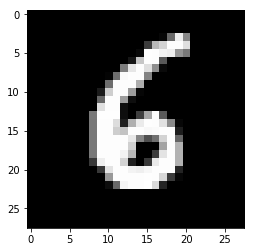

In [2]:
# Load training + test data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("training data shape:", x_train.shape, y_train.shape)
print("test data shape:", x_test.shape, y_test.shape)

# Take subset (1k of the 10k test images)
X = x_test[:1000]
Y = y_test[:1000]

# Show sample image, note its a 28x28 array
example_image = X[986]
print("example image shape:", example_image.shape)
imshow(X[986], cmap='gray')


# Flatten data elements from 28x28 array to 784-dim vector
X = X.reshape(1000, 784)
print("flattened X shape:", X.shape)

In [3]:
# compute MDS embedding (2D)
# Docs: http://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html
# Note: they use format of "rows are samples from R^N or R^k"
# Algorithm: https://en.wikipedia.org/wiki/Stress_majorization
t0 = time.perf_counter()
mds_2d = MDS(n_components=2, max_iter=300, verbose=1).fit_transform(X)
total_time = time.perf_counter() - t0
print ("runtime:", total_time)
print ("output shape:", mds_2d.shape)

runtime: 63.94442833430749
output shape: (1000, 2)


c:\users\matt smart\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


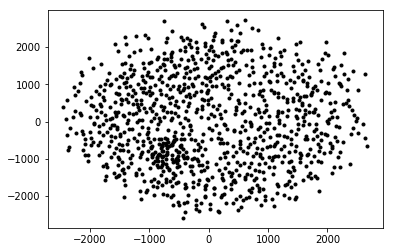

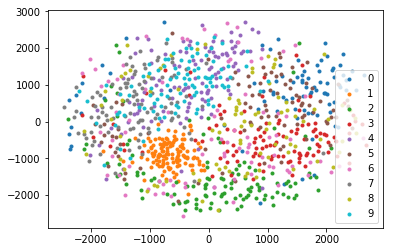

In [4]:
# unlabelled plot
fig_raw = plt.figure()
ax_raw = fig_raw.add_subplot(111)
ax_raw.scatter(mds_2d[:,0], mds_2d[:,1], marker='.', color='black')
fig_raw.show()

# labelled plot
fig_coloured = plt.figure()
ax_coloured = fig_coloured.add_subplot(111)
for label in set(Y):
    mask = Y==label
    ax_coloured.scatter(mds_2d[:,0][mask], mds_2d[:,1][mask], marker = '.', label = label)   #, color =  label + 1) #, label = str(label))
ax_coloured.legend()
fig_coloured.show()

In [7]:
# compute MDS embedding (3D)
t0 = time.perf_counter()
mds_3d = MDS(n_components=3, max_iter=300, verbose=1).fit_transform(X)
total_time = time.perf_counter() - t0
print ("runtime:", total_time)
print ("output shape:", mds_3d.shape)

runtime: 66.86850314676292
output shape: (1000, 3)


<IPython.core.display.Javascript object>


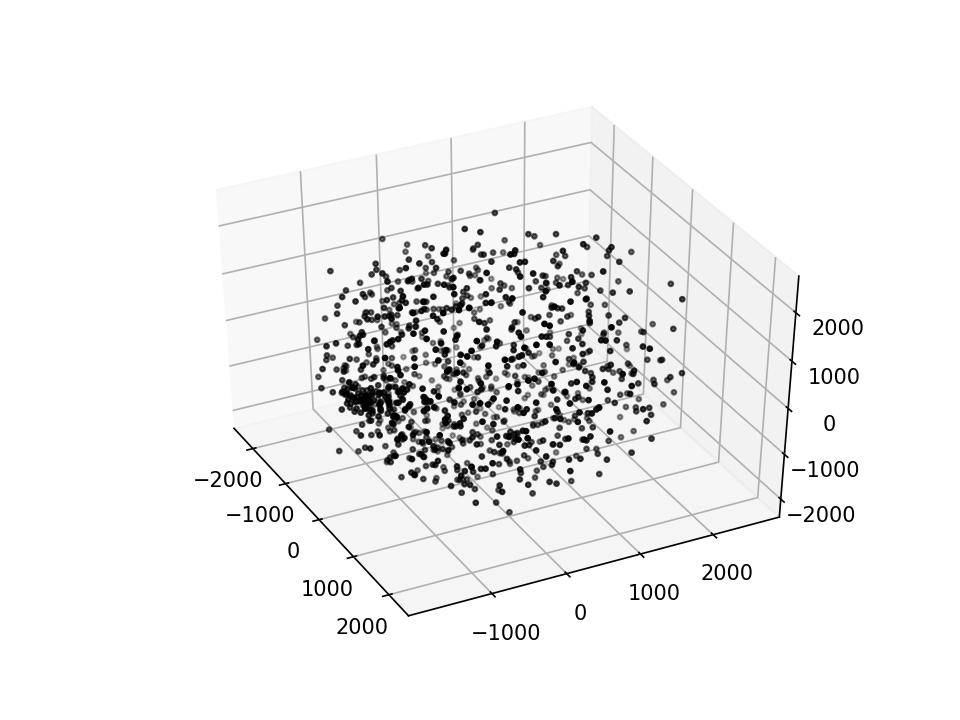

<IPython.core.display.Javascript object>


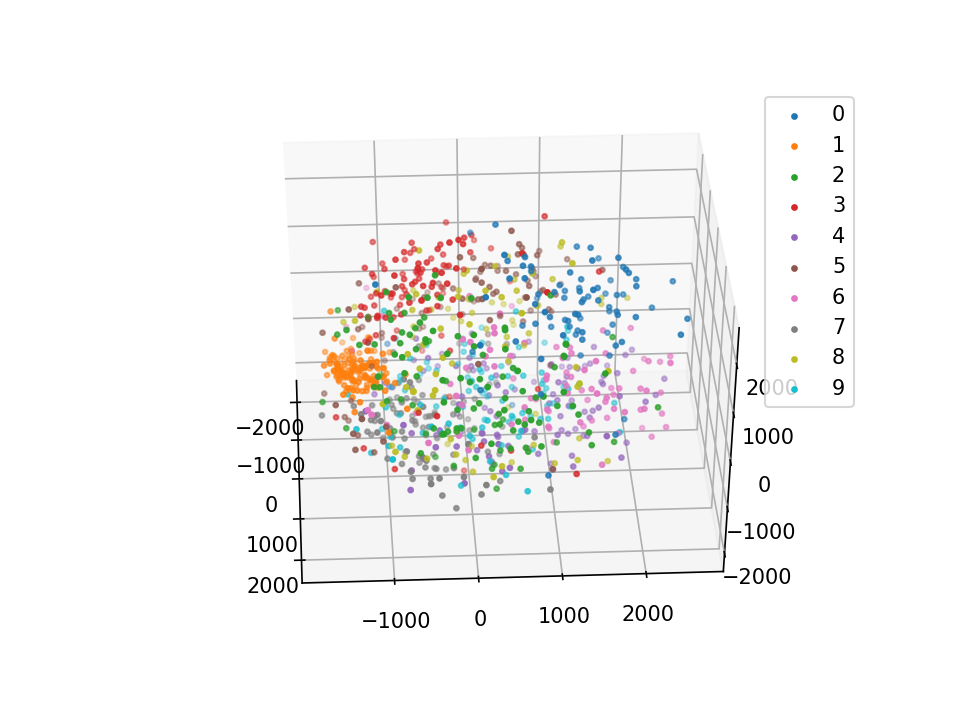

In [10]:
from mpl_toolkits.mplot3d import Axes3D

# enable interactive plots
%matplotlib notebook  

# unlabelled plot
fig_raw = plt.figure()
ax_raw = fig_raw.add_subplot(111, projection='3d')
ax_raw.scatter(mds_3d[:,0], mds_3d[:,1], mds_3d[:,2], marker='.', color='black')
fig_raw.show()

# labelled plot
fig_coloured = plt.figure()
ax_coloured = fig_coloured.add_subplot(111, projection='3d')
for label in set(Y):
    mask = Y==label
    ax_coloured.scatter(mds_3d[:,0][mask], mds_3d[:,1][mask], mds_3d[:,2][mask], marker = '.', label = label)   #, color =  label + 1) #, label = str(label))
ax_coloured.legend()
fig_coloured.show()

In [14]:
import pandas as pd

# Pairwise distance between European cities
try:
    url = '../data/eurodist.csv'
    df = pd.read_csv(url)
except:
    url = 'https://raw.githubusercontent.com/neurospin/pystatsml/master/datasets/eurodist.csv'
    df = pd.read_csv(url)
print(df.iloc[:5, :5])
city = df["city"]
D = np.array(df.iloc[:, 1:]) # Distance matrix

# Arbitrary choice of K=2 components
Xr = MDS(dissimilarity='precomputed', n_components=2, random_state=40, max_iter=3000, eps=1e-9).fit_transform(D)

        city  Athens  Barcelona  Brussels  Calais
0     Athens       0       3313      2963    3175
1  Barcelona    3313          0      1318    1326
2   Brussels    2963       1318         0     204
3     Calais    3175       1326       204       0
4  Cherbourg    3339       1294       583     460


<IPython.core.display.Javascript object>


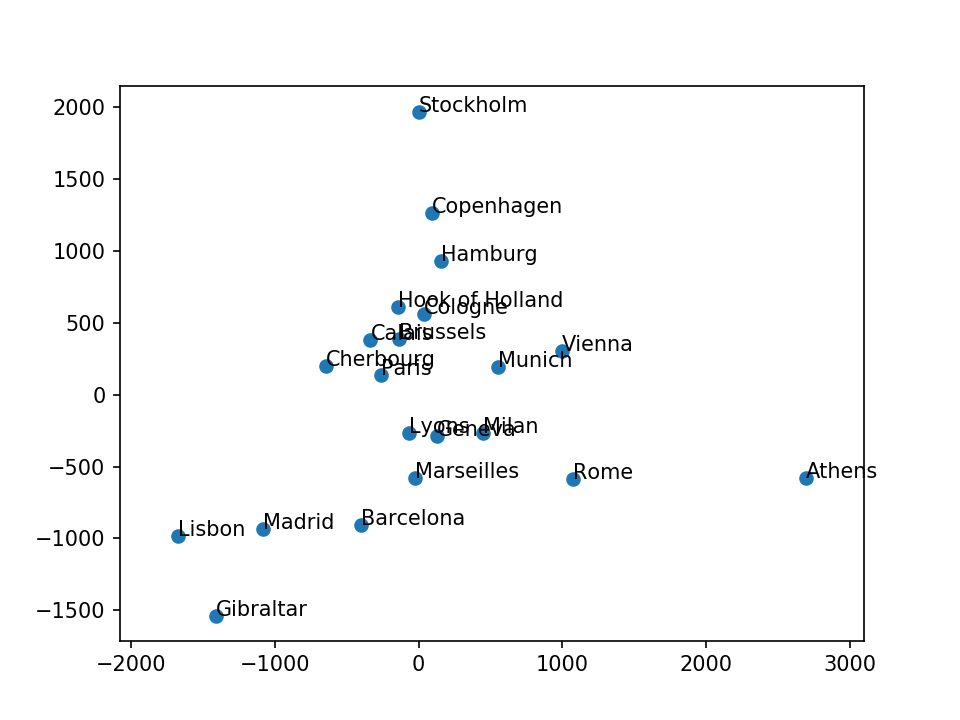

Athens [2695.78964823 -578.96732228]
Barcelona [-402.92537676 -903.67478465]
Brussels [-138.22766059  386.04774355]
Calais [-335.92017415  383.12770301]
Cherbourg [-642.70805902  198.13706668]
Cologne [ 37.36991866 561.15776784]
Copenhagen [  94.91832656 1267.26759733]
Geneva [ 126.48855698 -286.97733707]
Gibraltar [-1408.7437019  -1537.59107706]
Hamburg [157.84024745 929.08866265]
Hook of Holland [-141.14018729  612.92433068]
Lisbon [-1675.52612895  -986.48496493]
Lyons [ -64.30053884 -266.53662782]
Madrid [-1086.82060685  -934.50276954]
Marseilles [ -24.93022952 -583.41417256]
Milan [ 447.37220736 -268.21762103]
Munich [552.40887293 189.26680389]
Paris [-260.88142242  134.5327849 ]
Rome [1071.59546673 -587.00240825]
Stockholm [6.41973735e-01 1.97005478e+03]
Vienna [997.69886767 301.76384852]


(-1894.0985710327213,
 2914.362090312931,
 -1712.9822982911771,
 2145.4459973594435)

In [15]:
# Plot: apply some rotation and flip
theta = 80 * np.pi / 180.
rot = np.array([[np.cos(theta), -np.sin(theta)],
                [np.sin(theta), np.cos(theta)]])
Xr = np.dot(Xr, rot)

# flip x
Xr[:, 0] *= -1
plt.figure()
plt.scatter(Xr[:, 0], Xr[:, 1])
for i in range(len(city)):
    plt.text(Xr[i, 0], Xr[i, 1], city[i])
    print(city[i], Xr[i,:])
plt.axis('equal')

### Resources <a id='linkResources'></a>
- ...


- Mehta et al., 2017. A high-bias, low-variance introduction to Machine Learning for physicists. https://arxiv.org/abs/1803.08823
- Cox and Cox, 2001. MDS textbook, see Ch2, Ch3, Ch4
- Friedman et al., 2009. The Elements of Statistical Learning. (see 18.5.2)
- https://stats.stackexchange.com/questions/14002/whats-the-difference-between-principal-component-analysis-and-multidimensional
- https://papers.nips.cc/paper/1873-on-a-connection-between-kernel-pca-and-metric-multidimensional-scaling.pdf